#<font color="red"> Customer segmentation of a financial service provider </font>

In [1]:
!pip install kneed

In [2]:
#import the libraries useful for the analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.compose import ColumnTransformer

from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

from kneed import KneeLocator

from collections import Counter

In [3]:
#load the dataset

df=pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv").drop("CUST_ID", axis=1)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#<font color="red"> Exploratory Data Anlysis </font>

In [4]:
#check dataset's dimension

df.shape

(8950, 17)

In [5]:
#check nan values

df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [6]:
#check duplicates rows

df.duplicated().sum()

0

In [7]:
#check distribution's skewness

df.skew()

,0
BALANCE,2.393386
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
ONEOFF_PURCHASES,10.045083
INSTALLMENTS_PURCHASES,7.299120
CASH_ADVANCE,5.166609
PURCHASES_FREQUENCY,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201
CASH_ADVANCE_FREQUENCY,1.828686


In [8]:
#check dataset's statistics

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the statistics and the skewness index is clear that the variables have a different order of magnitude and an high level of skewness, so, after the imputation of the nan values, a standardization and a symmetrization of the values will be applicated.

In [9]:
#create a pairplot

sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

From the data distributions it's clear that there are no sferical clusters clearly visible, so i decide to use the DBSCAN model to make the analysis.

#<font color="red"> Pre-Processing </font>

##<font color="green"> Imputation </font>

In [10]:
#fill nan values with median beacuse of the distribution's skewness

df_filled= df.fillna(df.median())

##<font color="green"> Scaling </font>

In [11]:
#make a copy of the original dataset

X=df_filled.copy()

In [12]:
#standardization

ss=StandardScaler()

X2=ss.fit_transform(X)

In [13]:
#check the good ending of the scaling procedure

np.mean(X2), np.std(X2)

(2.3910475235568273e-17, 0.9999999999999999)

In [14]:
#create a pipeline

pipe= make_pipeline(ss)

##<font color="green"> Pricipal Component Analysis </font>

In [15]:
#use the pca in order to obtain linearly not correlated variables and choose the ones who contains more variance

pca=PCA()

pca.fit(X2)

PCA()

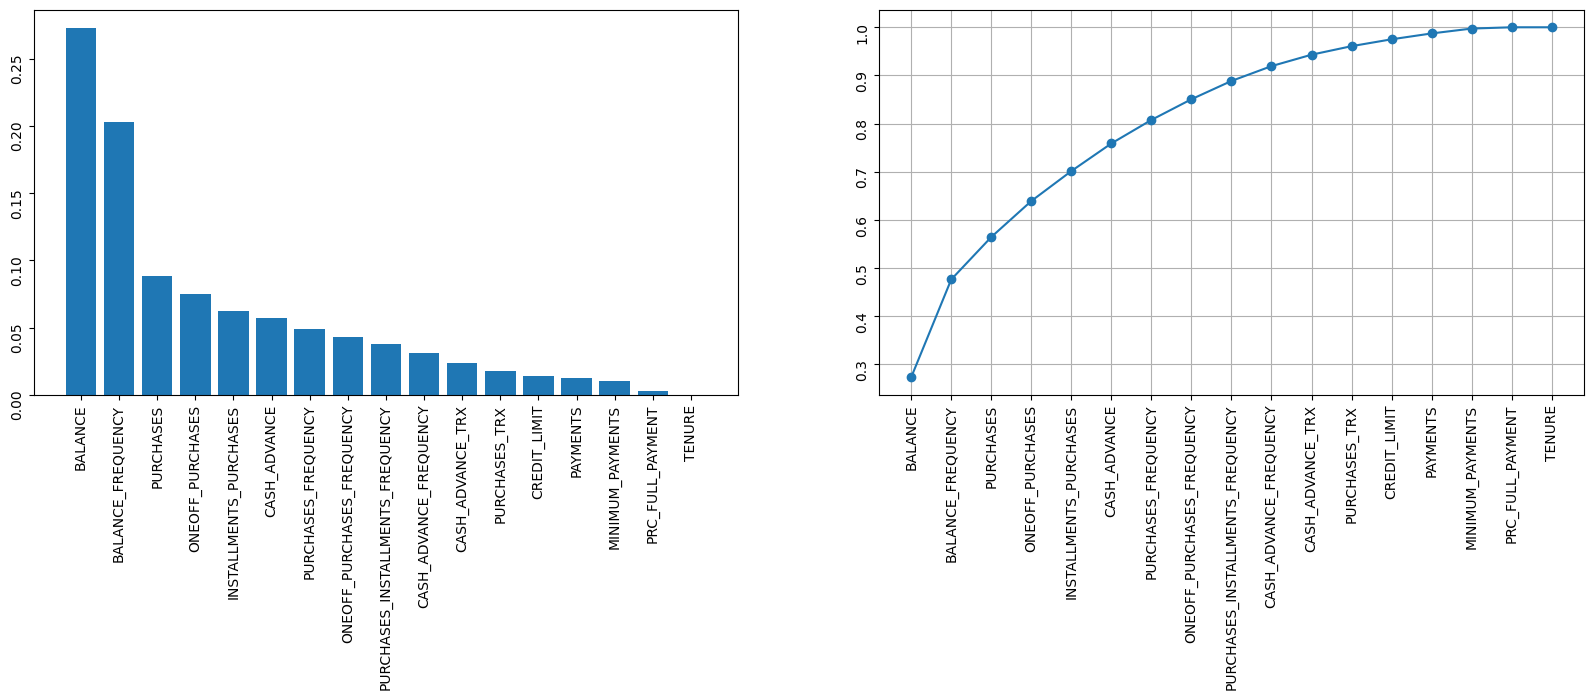

In [16]:
#check which components contain an higher level of variance

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(20, 5))

ax1.bar(df.columns, pca.explained_variance_ratio_)

ax1.tick_params(labelrotation=90)

ax2.plot(df.columns, np.cumsum(pca.explained_variance_ratio_), marker="o")

ax2.tick_params(labelrotation=90)

plt.grid()

plt.show()

Although the variance level drastically decrease from the variable "Purchases" (left-side chart, third variable) i decide to take the first eight components to make the analysis, beacuse they contain a percentage of variance around the 85% (right-side chart).

In [17]:
#selection of first eight components

pca=PCA(8)

pca.fit_transform(X2)

array([[-1.68364879, -1.07224148, -0.47566008, ..., -0.06806942,
        -0.82215526, -0.01895178],
       [-1.13408493,  2.50914981, -0.60221631, ...,  1.10225463,
         0.38428208,  0.17615355],
       [ 0.96939499, -0.3835769 , -0.09096976, ...,  0.32018501,
         1.54249644, -0.22936433],
       ...,
       [-0.92898512, -1.80804835,  0.45824238, ..., -2.98078368,
         1.4032653 , -0.29283192],
       [-2.33784475, -0.65361133, -0.98283115, ..., -3.17948406,
         0.97353358,  0.23086252],
       [-0.55802653, -0.4006461 , -1.0336456 , ..., -3.67556151,
         1.4192505 , -0.40444471]])

In [18]:
#add the trasformation to the pipeline

pipe=make_pipeline(ss, pca)

X3= pipe.fit_transform(X)

##<font color="green"> Symmetrization </font>

In [19]:
#check the skewness before the symmetrization

np.abs(skew(X3))

array([3.22783504, 2.0638026 , 1.61543576, 0.00863894, 1.81199487,
       1.51341812, 0.31563775, 2.92416788])

In [20]:
#create an istance of the transformer

pt= PowerTransformer()

X4= pt.fit_transform(X3)

In [21]:
#check the skewness after the symmetrization

np.abs(skew(X4))

array([0.14447616, 0.0965792 , 0.00164393, 0.4682264 , 0.05979878,
       0.38214225, 0.46382554, 0.13161984])

In [22]:
#check where the skewness, after transformation, is lower than before

var_list= np.abs(skew(X4))<np.abs(skew(X3))

In [23]:
#use the ColumnTransformer object in order to applicate power transformation only to the columns where the skewness is lower

ct=ColumnTransformer([
    ("PowerTransformer", PowerTransformer(), var_list)
], remainder="passthrough")

ct.fit_transform(X3)

array([[-1.08192996, -0.55322843, -0.46234651, ...,  0.08806093,
         0.67992776, -0.82215526],
       [-0.51432113,  1.35344042, -0.55964462, ...,  0.32693552,
        -0.10954206,  0.38428208],
       [ 0.81686686,  0.07402733, -0.15487281, ..., -0.18970001,
         1.2383594 ,  1.54249644],
       ...,
       [-0.32450512, -1.39316868,  0.32305762, ..., -0.27741696,
        -2.29630116,  1.4032653 ],
       [-1.86245041, -0.15233607, -0.8431971 , ...,  0.39102511,
        -1.84769164,  0.97353358],
       [-0.01360824,  0.06050361, -0.88014702, ..., -0.43582663,
        -1.94002584,  1.4192505 ]])

In [24]:
#add the object to the pipeline

pipe= make_pipeline(ss, pca, ct)

X4=pipe.fit_transform(X)

In [25]:
#check the good ending of the power transformation

np.abs(skew(X4))

array([0.14447616, 0.0965792 , 0.00164393, 0.05979878, 0.38214225,
       0.13161984, 0.00863894, 0.31563775])

##<font color="green"> Final Scaling </font>

In [26]:
#create an instance of the scaler

ss_2=StandardScaler()

In [27]:
#add the last object to the pipeline

pipe=make_pipeline(ss, pca, ct, ss_2)

X5= pipe.fit_transform(X)

In [28]:
#X5 will be the final dataset on which the model will be used

#<font color="red"> Model's Application </font>

##<font color="green"> DBSCAN </font>

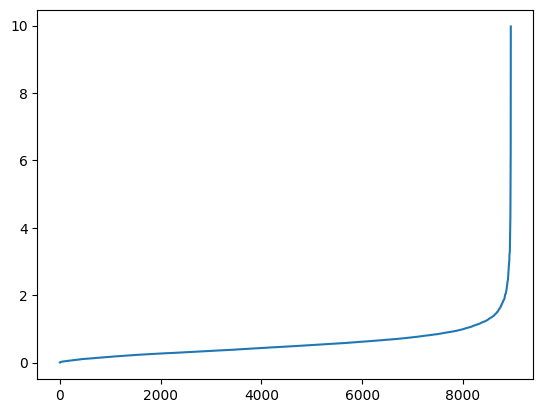

In [29]:
#get the best epsilon's values using the NearestNeighbors object

neigh=NearestNeighbors(n_neighbors=3).fit(X5)

distances, distances_index= neigh.kneighbors(X5)

#consider only the last array, which contains the distances between the point and the farthest neighbor

distances= np.sort(distances[:, -1])

plt.plot(range(len(distances)), distances)

plt.show()

In [30]:
#get the elbow's value with precision using the KneeLocator object

locator= KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")

knee=locator.knee_y

In [31]:
#create an instance of the DBSCAN object using the epsilon value

dbscan=DBSCAN(eps=knee, min_samples=3)

pred= dbscan.fit_predict(X5)

In [32]:
#get the clusters number found by model and the number of values contained in each ones

Counter(pred)

Counter({0: 8870, -1: 80})

In [33]:
#add a column to the original dataset containing the cluster relative to each observation

X["clusters"]=pred

In [34]:
#group the dataset by clusters and show their statistics

X.groupby("clusters").aggregate(["count", "mean", "std", "min", "max"])[["BALANCE", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "BALANCE_FREQUENCY"]]

BALANCE                                                    \
           count         mean          std        min          max   
clusters                                                             
-1            80  5553.367143  4242.101829  15.173238  19043.13856   
 0          8870  1528.498347  2016.617818   0.000000  18495.55855   

         ONEOFF_PURCHASES                                            \
                    count         mean           std  min       max   
clusters                                                              
-1                     80  7464.043875  10801.639628  0.0  40761.25   
 0                   8870   530.461213   1145.005294  0.0  14215.00   

         INSTALLMENTS_PURCHASES                                          \
                          count         mean          std  min      max   
clusters                                                                  
-1                           80  3509.571625  4707.326932  0.0  22500.0   
 0                         8870   383.121724   735.148902  0.0  12541.0   

         BALANCE_FREQUENCY                                     
                     count      mean       std       min  max  
clusters                                                       
-1                      80  0.922383  0.158846  0.181818  1.0  
 0                    8870  0.876864  0.237458  0.000000  1.0

In [35]:
X.groupby("clusters").aggregate(["count", "mean", "std", "min", "max"])[["MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT"]]

MINIMUM_PAYMENTS                                                     \
                    count         mean           std        min          max   
clusters                                                                       
-1                     80  7417.138315  14858.520908  71.089430  76406.20752   
 0                   8870   785.630721   1769.556325   0.019163  38512.12477   

         PRC_FULL_PAYMENT                                
                    count      mean       std  min  max  
clusters                                                 
-1                     80  0.300997  0.377075  0.0  1.0  
 0                   8870  0.152386  0.291314  0.0  1.0

In [36]:
X.groupby("clusters").aggregate(["count", "mean", "std", "min", "max"])[["CASH_ADVANCE", "PURCHASES_FREQUENCY"]]

CASH_ADVANCE                                              \
                count         mean          std  min          max   
clusters                                                            
-1                 80  5944.518934  8727.776242  0.0  47137.21176   
 0               8870   934.085112  1880.114376  0.0  26194.04954   

         PURCHASES_FREQUENCY                                
                       count      mean       std  min  max  
clusters                                                    
-1                        80  0.726412  0.360105  0.0  1.0  
 0                      8870  0.488221  0.401110  0.0  1.0

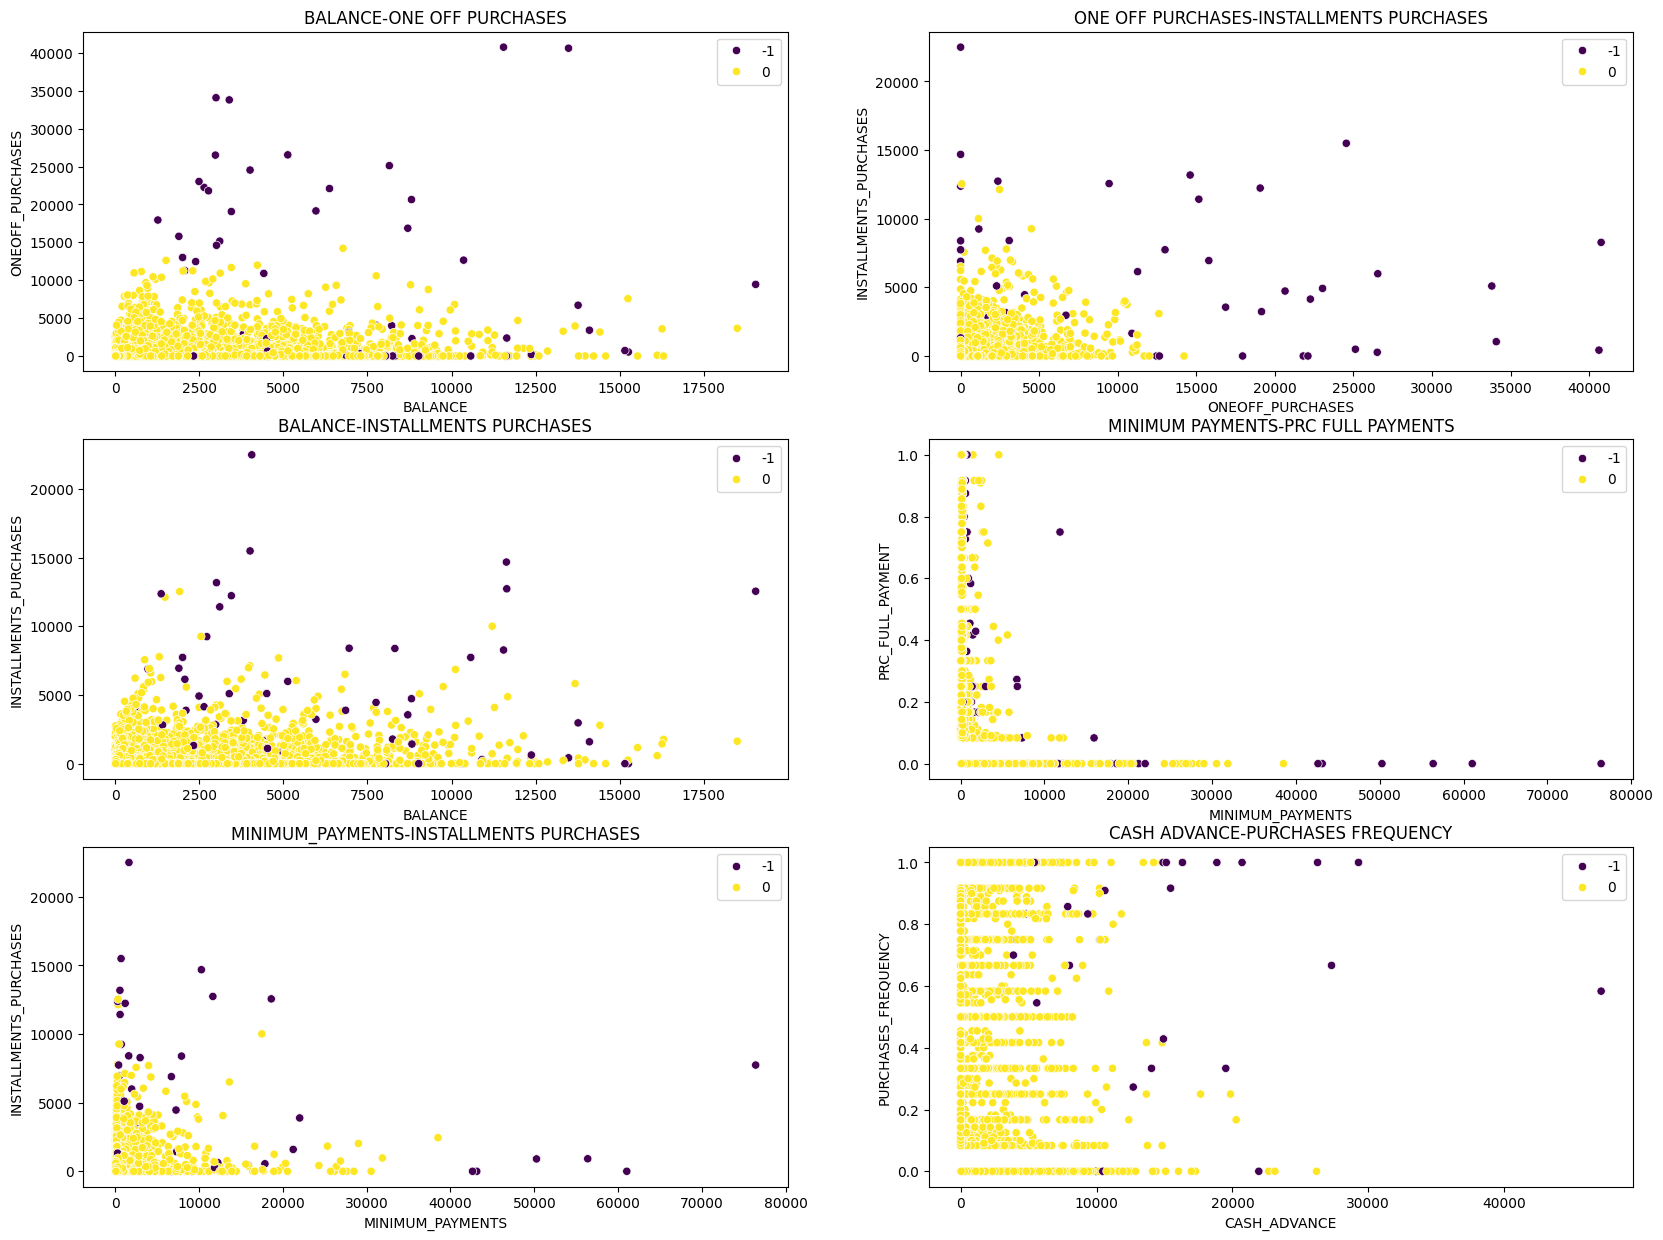

In [38]:
#create six charts representing the variables under analysis

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(3, 2,  figsize=(20, 15))

ax1= sns.scatterplot(x=X["BALANCE"], y=X["ONEOFF_PURCHASES"], hue=pred, ax=ax1, palette="viridis")

ax1.set_title("BALANCE-ONE OFF PURCHASES")

ax2=sns.scatterplot(x=X["ONEOFF_PURCHASES"], y=X["INSTALLMENTS_PURCHASES"], hue=pred, ax=ax2, palette="viridis")

ax2.set_title("ONE OFF PURCHASES-INSTALLMENTS PURCHASES")

ax3=sns.scatterplot(x=X["BALANCE"], y=X["INSTALLMENTS_PURCHASES"], hue=pred, ax=ax3, palette="viridis")

ax3.set_title("BALANCE-INSTALLMENTS PURCHASES")

ax4= sns.scatterplot(x=X["MINIMUM_PAYMENTS"], y=X["PRC_FULL_PAYMENT"], hue=pred, ax=ax4, palette="viridis")

ax4.set_title("MINIMUM PAYMENTS-PRC FULL PAYMENTS")

ax5= sns.scatterplot(x=X["MINIMUM_PAYMENTS"], y=X["INSTALLMENTS_PURCHASES"], hue=pred, ax=ax5, palette="viridis")

ax5.set_title("MINIMUM_PAYMENTS-INSTALLMENTS PURCHASES")

ax6= sns.scatterplot(x=X["CASH_ADVANCE"], y=X["PURCHASES_FREQUENCY"], hue=pred, ax=ax6, palette="viridis")

ax6.set_title("CASH ADVANCE-PURCHASES FREQUENCY")

plt.show()

##<font color="blue"> General Conclusion </font>

The model fails to identify specific clusters within the dataset, as the behavior of this financial service provider's customers is rather homogeneous and lacks variety, with a few isolated cases that will be explored shortly.

##<font color="blue"> Mean expenses </font>

On average, customers have €1,500 in their accounts and tend to spend more on one-time purchases rather than through installment payments. As shown in the first chart in the top left ("BALANCE-ONE OFF PURCHASES"), paradoxically, higher spending amounts are observed when the account balance is lower. Installment payments follow the same trend (chart in the center left, "BALANCE-INSTALLMENTS PURCHASES").
One-time payments are almost perfectly distributed within a range of €0 to €10,000 (top-right chart, "ONE OFF PURCHASES-INSTALLMENTS PURCHASES").
There are also isolated cases where significantly higher account balances are observed for purchases, leading to higher one-time and installment payment amounts. In these cases, higher amounts are still predominantly spent on one-time payments.

##<font color="blue"> Payment habits </font>

On average, the minimum payments made by customers are around €785. Customers with lower minimum payment amounts also tend to have a higher percentage of full payments. As shown in the center-right chart ("MINIMUM PAYMENTS-PRC FULL PAYMENTS"), customers with higher minimum payment amounts tend to have a full payment percentage close to 0. This happens because customers who rely more on installment payments are precisely those with a lower average minimum payment (bottom-left chart, "MINIMUM PAYMENTS-INSTALLMENTS PURCHASES").

##<font color="blue"> Card usage frequency </font>

As shown in the last chart in the bottom-right corner ("CASH ADVANCE-PURCHASES FREQUENCY"), cash advances range from €0 to approximately €26,000 but are primarily concentrated in a range starting at €0 and reaching around €10,000, with a very high frequency in the lower values of this range. The average cash advance amount is around €1,000.
Purchase frequency is almost evenly distributed across all customers. For a score ranging from 0 to 1, where 0 represents no activity and 1 represents frequent activity, the average score is 0.48.

#<font color="red"> Marketing Strategies </font>

##<font color="green"> Encourage installment payments </font>

The company could launch initiatives aimed at encouraging installment payments, as the average amount spent using this payment method is relatively low. This could indicate insufficient advertising by the company or a lack of initiatives promoting it. Below are some suggestions:
Offer 0% interest financing for 20 months for a limited period.
Maintain a constantly available credit line that allows 10 interest-free installments at any time the customer subscribes, up to a set maximum amount.
For purchases exceeding a certain threshold, the company could offer customers 0% interest financing for up to 60 months to cover half of the expense and provide preferential rates for up to 120 months for the total amount.

##<font color="green"> Incentives for cash advance </font>

Cash advances could be encouraged by offering free withdrawals when using ATMs belonging to a partner bank.
In many cases, cash advances are withdrawn abroad due to sudden emergencies or the inability to pay by card. Reducing the fixed withdrawal fee or the proportional percentage of the amount withdrawn abroad, up to a predetermined threshold, could be beneficial.